In [1]:
import os
import numpy as np
from glob import glob
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
os.path.join("a", "b", "c")

'a/b/c'

In [3]:
class PASTISSegmentation:
    """
    Here we use a subset of the PASTIS dataset: https://github.com/VSainteuf/pastis-benchmark
    """
    def __init__(
        self,
        image_dir: str,
        annotation_dir: str,
        split:str = "train",
        median_of_days: bool = False,
        binary_labels: bool = False
    ) -> None:
        
        images = glob(os.path.join(image_dir, split, 'S2_*.npy'))
        annotations = []
        for im in images:
            name = os.path.splitext(os.path.basename(im))[0].replace("S2_", "")
            annotations.append(os.path.join(annotation_dir, split, f"TARGET_{name}.npy"))

        # Store in the class for future reference
        self.median_of_days = median_of_days
        self.binary_labels = binary_labels
        
        # Load data
        self.X = self.read_data(images)
        if median_of_days:
            self.X = np.median(self.X, axis=1) #Take median value across 43 days

        self.y = self.read_data(annotations)
        self.y = self.y[:,0] # We are only interested in the 20 classes for now
        if binary_labels:
            self.y[self.y>0] = 1 # Convert to binary labels
        
    def __len__(self):
        return self.X.shape[0]
    
    def read_data(self, files):
        """
        Reads and stacks our data
        """
        t = []
        for im in files:
            t.append(np.load(im))
        return np.stack(t, axis=0)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def pixelwise(self):
        """
        This method flattens our images to individual pixels, so we can treat
        each pixel as a sample and train our favirote classifier on it. 
        """
        if self.median_of_days:
            return  np.transpose(self.X, (0, 2, 3, 1)).reshape(-1, 10), self.y.reshape(-1)
        else:
            return  np.transpose(self.X, (0, 3, 4, 1, 2)).reshape(-1, 430), self.y.reshape(-1)
    
    def pixelwise_test(self):
        """
        Short test for the above method.
        """
        N = self.__len__()
        
        pX, py = self.pixelwise()
        if self.median_of_days:
            tX = np.transpose(pX.reshape(N, 128, 128, 10), (0, 3, 1, 2))    
        else:
            tX = np.transpose(pX.reshape(N, 128, 128, 43, 10), (0, 3, 4, 1, 2))
        tY = py.reshape(N, 128, 128)
        assert np.all(tX == self.X) and np.all(tY == self.y)
        print("All test passed!")

In [5]:
base_path = "../" # Define it
p_train = PASTISSegmentation(os.path.join(base_path, "data", "images"),
                             os.path.join(base_path, "data", "annotations"),
                             split="train",
                             median_of_days=True,
                             binary_labels=False)

p_test = PASTISSegmentation(os.path.join(base_path, "data", "images"),
                             os.path.join(base_path, "data", "annotations"),
                            split="test",
                            median_of_days=True,
                            binary_labels=False)
p_train.pixelwise_test()
p_test.pixelwise_test()

X_train, y_train = p_train.pixelwise()
X_test, y_test = p_test.pixelwise()

All test passed!
All test passed!


In [6]:
# Instead of images, we focus on the individual pixels. For each pixel, we have 10 features and a class (in y).
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((245760, 10), (245760,), (81920, 10), (81920,))

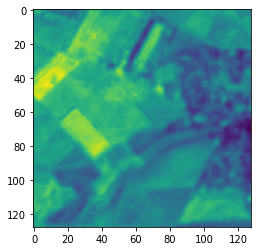

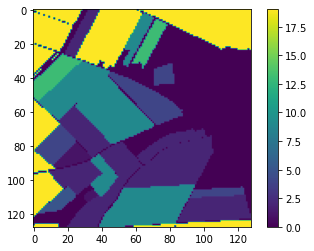

In [7]:
imd = 5
# Show the 3rd band of the third image
plt.imshow(p_train.X[imd, 3])
plt.show()

# Show the labels for third image
plt.imshow(p_train.y[imd])
plt.colorbar()
plt.show()

# Logistic Regression

In [ ]:
# TODO: Define the logistic classifier and fit it on the training set (X_train, y_train)
# Hint: If using sklearn set n_jobs=-1 for parallezing the model fit
logistic_regressor = ??


In [ ]:
# TODO: Validate on the validation data (X_test, y_test: accuracy, recall, and precision). 

In [ ]:
# TODO: Display the results in an image for one of the images in the test set


# Random Forest

In [ ]:
# TODO: Define the  Random Forest classifier and fit it on the training set (X_train, y_train)
# Hint: If using sklearn set n_jobs=-1 for parallezing the model fit
random_forest = ??


In [ ]:
# TODO: Validate on the validation data (X_test, y_test: accuracy, recall, and precision). 

In [ ]:
# Task 2a: Plot the confusion matrix of the given method at a probability cutoff of 0.5
def confusion_matrix(y_pred_prob, y_test, cutoff=0.5):
    """Implement me!"""
    pass


In [ ]:
# TODO: Display the results in an image for one of the images in the test set


# Fluctuations of validation error 

In this task we explore fluctuations of validation error as a function of the size of validation set and the dependence of the validation error on the size of the training set. 
In order to explore fluctuations of the validation error as a function of the size of the validation set we use the following construction:

• Use the range(1, 1001, 200) K samples for training/fitting 5 methods using the given  method/notebook. 

• Consider five validation sets of sizes range(1, 101, 20).  

• Calculate the validation error for each of the sets as a function of K, for K ∈ {1, . . . , 801}. Plot the 
validation error for each of the five validation sets as a function of K in a figure (you will get five lines in the figure).

• Create one more figure, where for each training set with K samples you plot the variance of the validation error over the five validation sets, as a function of K. You will get five scattered points in this graph.

• Comment on your observations.
